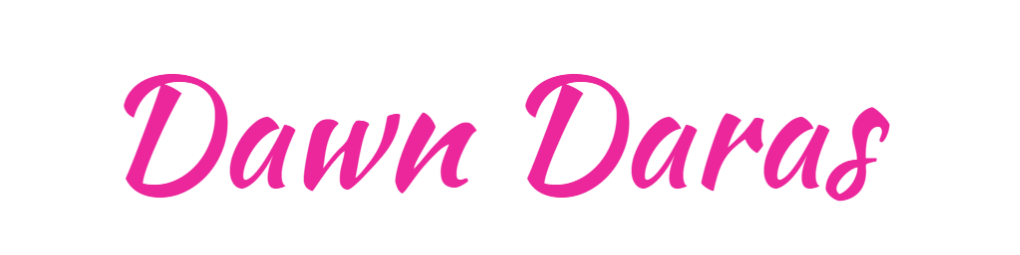

###**Part Two -- From EDAS to Linear Regression using R on Google Colab**

###We will be doing correlation, and linear regression in this part of our coding activity

####We will be using a native R dataset

#####*The same code can be run in any R environment*

###**First connect your runtime environment on the top right**###


##Data Prep for the State Dataset, which comes with R
###This combines three datasets state.abb, state.x77, and state.region
###Here I combine them into one dataset "States" in preparation for the EDAs portion of this demonstration

In [1]:
tem <-data.frame(state.x77)  #bringing in state.x77 as a dataframe
states <-cbind(state.abb, tem, state.region) #Combine all three data sets into a dataframe

In [2]:
#Rename the first and 10th column
colnames(states)[1] <- "State"               # Rename first column
colnames(states)[10] <- "Region"              # Rename the 10th column
head(states, 5)

,State,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,Region
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Alabama,AL,3615,3624,2.1,69.05,15.1,41.3,20,50708,South
Alaska,AK,365,6315,1.5,69.31,11.3,66.7,152,566432,West
Arizona,AZ,2212,4530,1.8,70.55,7.8,58.1,15,113417,West
Arkansas,AR,2110,3378,1.9,70.66,10.1,39.9,65,51945,South
California,CA,21198,5114,1.1,71.71,10.3,62.6,20,156361,West


In [3]:
str(states)  # structure of data object, data types for each column
#as well as data types - this will be important as we proceed

'data.frame':	50 obs. of  10 variables:
 $ State     : chr  "AL" "AK" "AZ" "AR" ...
 $ Population: num  3615 365 2212 2110 21198 ...
 $ Income    : num  3624 6315 4530 3378 5114 ...
 $ Illiteracy: num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Life.Exp  : num  69 69.3 70.5 70.7 71.7 ...
 $ Murder    : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ HS.Grad   : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ Frost     : num  20 152 15 65 20 166 139 103 11 60 ...
 $ Area      : num  50708 566432 113417 51945 156361 ...
 $ Region    : Factor w/ 4 levels "Northeast","South",..: 2 4 4 2 4 4 1 2 2 2 ...


###In part 1, we examined the States dataset to learn that they more or less met the assumptions of normality, which is required for linear regression

####There are four assumptions associated with the linear regression model.  We have examined most of them in the part 1, but we will exam the last here.  They are:

####1) Linearity: The relationship between X and the mean of Y is linear.
####2) Homoscedasticity: The variance of residual is the same for any value of X.
####3) Independence: Observations are independent of each other.
####4) Normality: For any fixed value of X, Y is normally distributed.

####We examined #4 during our EDA's, and #3 is rather assumed. We will now be looking at #1 and then #2

***We checked the linearity when we plotted our quantiles.
We will examine our residuals later
We will be checking for independance of observations through running correlations and making sure that none of our independant variables (predicting variables) are too highly related to each other.
We checked for normality when we looked at the distributions of each of the independant variables.

###Relationships between variables

####We are going to examine the relationships between variables. For the quantitative variables, we are going to run a correlation analysis.  A correlation looks at the *strength and direction* of relationship. It does not indicate prediction (that is what linear regression is for.)

####We run these tests because, particularly with the quantitative variables, we are looking to see if variables are linearly related, and thus linear regression is an appropriate model to use.

*The Correlation Matrix*
***The range of the correlation coefficient is R and it is measured from [-1, 1]. The coefficient -1 implies two variables are strictly negatively related, such as y = −x. And coefficient 1 implies positive related, such as  y = 2x + 1***


*Evaluating a Correlation Matrix*
***In reading a correlation matrix <  +/-.29 is considered a LOW correlation

between +/- .30 and .49 is a MEDIUM correlation and

between +/- .50 and 1.00 is a HIGH correlation

In [4]:
#Pearsons Correlation Test
#Correlation Matrix for All Quantitative Variables
#drop variables that are not quantitative or are categorical
#We are also saving the correlation matrix itself as a dataframe for a visualization
df = subset(states, select = -c(State, Region) )
cormat <- round(cor(df),
  digits = 2 # rounded to 2 decimals
)
print(cormat)

           Population Income Illiteracy Life.Exp Murder HS.Grad Frost  Area
Population       1.00   0.21       0.11    -0.07   0.34   -0.10 -0.33  0.02
Income           0.21   1.00      -0.44     0.34  -0.23    0.62  0.23  0.36
Illiteracy       0.11  -0.44       1.00    -0.59   0.70   -0.66 -0.67  0.08
Life.Exp        -0.07   0.34      -0.59     1.00  -0.78    0.58  0.26 -0.11
Murder           0.34  -0.23       0.70    -0.78   1.00   -0.49 -0.54  0.23
HS.Grad         -0.10   0.62      -0.66     0.58  -0.49    1.00  0.37  0.33
Frost           -0.33   0.23      -0.67     0.26  -0.54    0.37  1.00  0.06
Area             0.02   0.36       0.08    -0.11   0.23    0.33  0.06  1.00


***From the matrix above, we can see, first that none of our variables are too highly related (around .8) that the highest correlations include:
HS Grad and Income (positive and above .5, Illiteracy and Life Exp, negative and -.59, Illiteracy and H.S. Grad, also negative and -.66, Illiteracy and Frost, -.67.  Murder and Life. Exp - negative and -.78, murder and frost, -.54.).  Some of these correlations may be obvious - for example - if a higher murder rate equivalent with a lower life expectancy.  But some may have mediating factors - or other factors.  So, for example, Frost may have to do with region.  First we are going to visualize the correlation matrix to highlight the highest correlations***

In [5]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.92 loaded



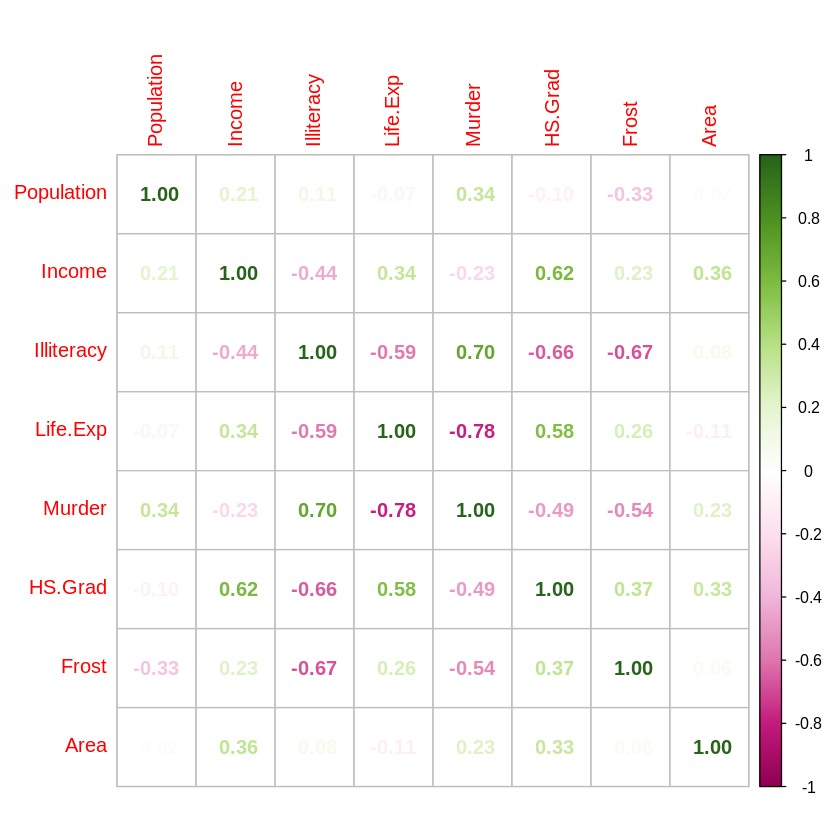

In [6]:
library(corrplot)
datamatrix <-cor(df)
corrplot(datamatrix, method="number", col = COL2('PiYG'))

***Positive correlation between Murder and Illiteracy with an r-value of 0.70 means that the lower education level the state has, the higher chance of murder rate the state will have; Negative correlations between Murder and Life.Exp, Frost, with r-values of -0.78, and -0.54 illustrate that the more occurrence of murder, the shorter life the state will expect; And the colder the weather, the lower chance the murder will occur. It’s interesting!***

***Now let's look at the cluster of these variables***

***From this visualization, we are able to see that there are two clusters for these variables.  Murder is most closely related to illiteracy and then population and area.  Income is most closely related to HS Grad and then life expectancy.  Because of this relationship to Murder of Area and Population, we are going to create a new variable, "Density."

***Now we are going to explore the area between population and area as "density" as we continue to explore relationships between variables.***
**To do this, we are going to calculate a new variable called "Density,"
which is Population divided by Area.  

In [7]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(tidyverse)
my_data <- as_tibble(states)
head(my_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


State,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,Region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
AL,3615,3624,2.1,69.05,15.1,41.3,20,50708,South
AK,365,6315,1.5,69.31,11.3,66.7,152,566432,West
AZ,2212,4530,1.8,70.55,7.8,58.1,15,113417,West
AR,2110,3378,1.9,70.66,10.1,39.9,65,51945,South
CA,21198,5114,1.1,71.71,10.3,62.6,20,156361,West
CO,2541,4884,0.7,72.06,6.8,63.9,166,103766,West


In [9]:
data2 <- my_data %>%
  mutate(Density = states$Population/states$Area)
  head(data2, 5)

State,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,Region,Density
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
AL,3615,3624,2.1,69.05,15.1,41.3,20,50708,South,0.0712905261
AK,365,6315,1.5,69.31,11.3,66.7,152,566432,West,0.0006443845
AZ,2212,4530,1.8,70.55,7.8,58.1,15,113417,West,0.0195032491
AR,2110,3378,1.9,70.66,10.1,39.9,65,51945,South,0.0406198864
CA,21198,5114,1.1,71.71,10.3,62.6,20,156361,West,0.1355708904


In [10]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


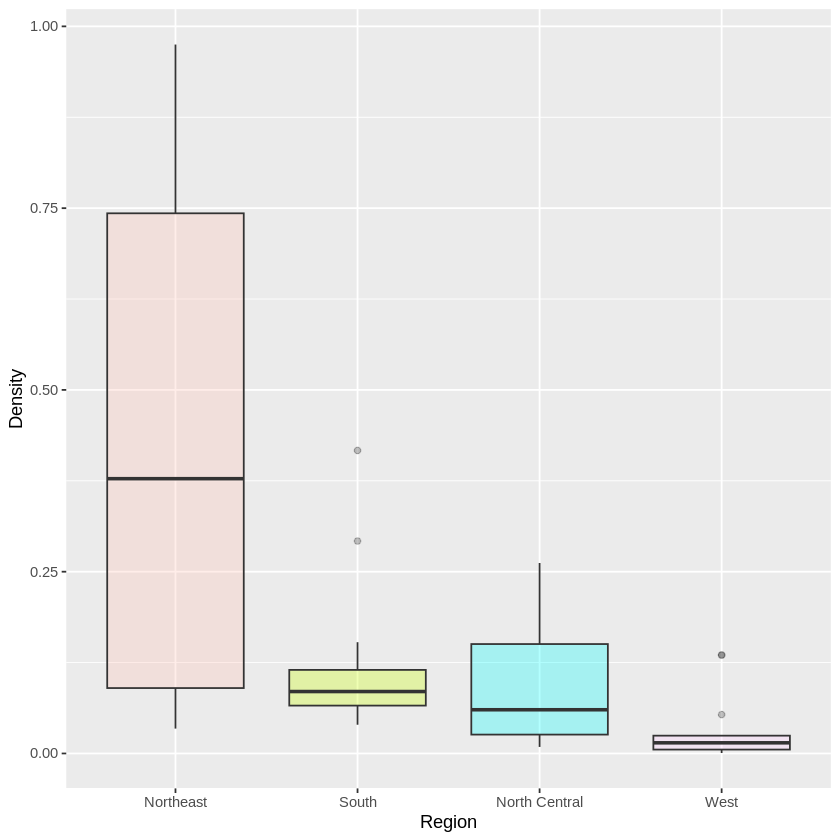

In [11]:
library(ggplot2)
# Bottom Left
ggplot(data2, aes(x=Region, y=Density, fill=Region)) +
    geom_boxplot(alpha=0.3) +
    theme(legend.position="none") +
    scale_fill_brewer(palette="Dark2") +
    scale_fill_hue(c=150, l=100)

***From this we can see that the Northeast has a much higher mean population density, and the West the lowest.  We can run an Analysis of Variance (ANOVA), which is a statistical test comparing the group means.  The null (H0) hypothesis is that there is NO difference between groups.***

In [12]:
#ANOVA for comparing Density Means between Regions
model <- aov(data2$Density ~ data2$Region, data2)
summary(model)

             Df Sum Sq Mean Sq F value  Pr(>F)    
data2$Region  3  1.051  0.3502      12 6.3e-06 ***
Residuals    46  1.343  0.0292                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

***The P-value of 6.3e-06, less than .05, gives us evidence to reject the null that there is no difference between density means among regions, which we can also observe from our boxplots above.***

In [13]:
data3 = subset(data2, select = -c(Life.Exp, Frost, Area, Region) )
head(data3)

State,Population,Income,Illiteracy,Murder,HS.Grad,Density
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL,3615,3624,2.1,15.1,41.3,0.0712905261
AK,365,6315,1.5,11.3,66.7,0.0006443845
AZ,2212,4530,1.8,7.8,58.1,0.0195032491
AR,2110,3378,1.9,10.1,39.9,0.0406198864
CA,21198,5114,1.1,10.3,62.6,0.1355708904
CO,2541,4884,0.7,6.8,63.9,0.0244877898


***We will now run a simple linear regression model - predicting murder with illiteracy, the variable with the strongest correlation ***

In [14]:
#Simple Linear Regression Model
simplelm <- lm(Murder ~ Illiteracy, data = data3)

summary(simplelm)


Call:
lm(formula = Murder ~ Illiteracy, data = data3)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5315 -2.0602 -0.2503  1.6916  6.9745 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3968     0.8184   2.928   0.0052 ** 
Illiteracy    4.2575     0.6217   6.848 1.26e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.653 on 48 degrees of freedom
Multiple R-squared:  0.4942,	Adjusted R-squared:  0.4836 
F-statistic: 46.89 on 1 and 48 DF,  p-value: 1.258e-08


***Interpretation***
**The important output above:
1)The estimates (Estimate) for the model parameters – the value of the y-intercept (in this case 2.3968) and the estimated effect of income on murder (4.2575).
2) The Standard Error SE of the estimated values
3) The test statistic, in this case, the t-value
4) The p-value, he probability of finding the given t statistic if the null hypothesis of no relationship were true

Our R2 (r-squared) statistic is .48 or 48% of the change in Murder (our DV - dependant variable) can be explained by the change in illiteracy.

From these results, we can say that there is a significant positive relationship between illiteracy and murder (p value < 0.001), with a 4.2575 unit (+/- 0.01) increase in murder for every unit increase in illiteracy

Our equation can be written as:

Murder = 2.3968 +4.2575*Illiteracy


***Now we can check for the last of our assumptions of linearity - or homoscedasciticity - This means that the prediction error doesn’t change significantly over the range of prediction of the model. We can test this assumption later, after fitting the linear model.***

**The most important thing to look for is that the red lines representing the mean of the residuals are all basically horizontal and centered around zero. This means there are no outliers or biases in the data that would make a linear regression invalid.**

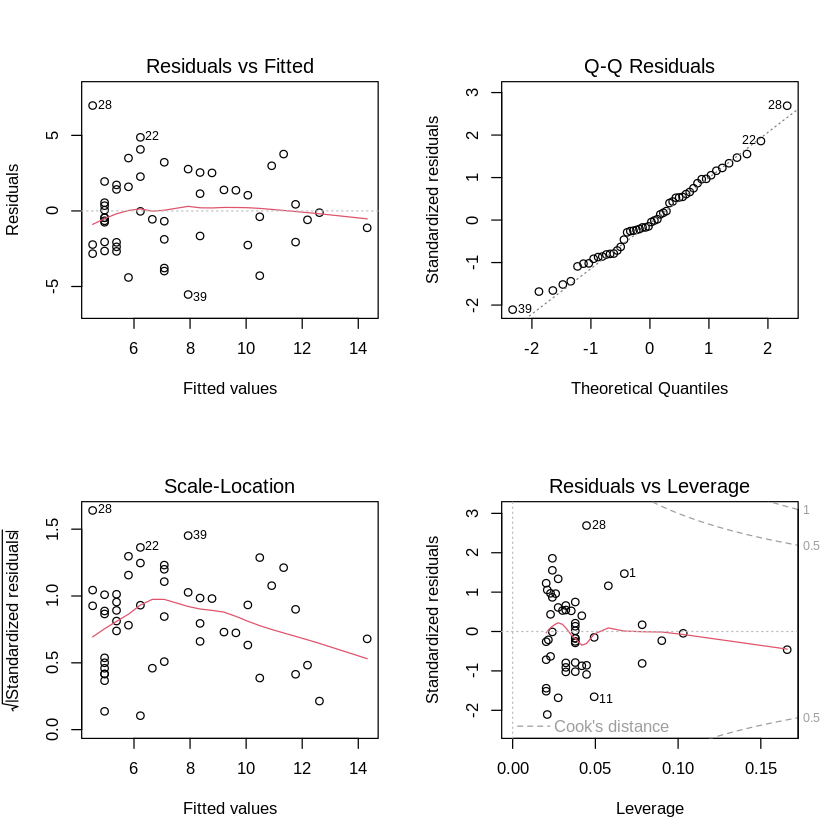

In [15]:
##Checking for Homoscedasciticity
par(mfrow=c(2,2))
plot(simplelm)
par(mfrow=c(1,1))

***We are preparing our data to conduct a multiple linear regression model, where we have several independant variables (predictors) for our dependant variable (DV). Because of the high correlation of HS.Grad with Illiteracy, Life.Exp, and Income, we will not put HS.Grad in the model. For a similar reason, we leave Frost out too.***

In [16]:
data4 = subset(data2, select = -c(Density, Frost, HS.Grad, State) )
head(data4, 5)

Population,Income,Illiteracy,Life.Exp,Murder,Area,Region
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3615,3624,2.1,69.05,15.1,50708,South
365,6315,1.5,69.31,11.3,566432,West
2212,4530,1.8,70.55,7.8,113417,West
2110,3378,1.9,70.66,10.1,51945,South
21198,5114,1.1,71.71,10.3,156361,West


In [17]:
##This is the multiple regression model, with the Region "South" as the reference region
lm.data <-data4
lm.data <- within(lm.data, Region <- relevel(Region, ref = "South"))  # Set region South as reference
multmodel <- lm(Murder ~ .,  data = lm.data)
summary(multmodel)


Call:
lm(formula = Murder ~ ., data = lm.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8178 -0.9446 -0.1485  1.0406  3.5501 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.059e+02  1.601e+01   6.611 5.85e-08 ***
Population           2.591e-04  5.439e-05   4.764 2.39e-05 ***
Income               2.619e-04  4.870e-04   0.538  0.59362    
Illiteracy           1.861e+00  5.567e-01   3.343  0.00178 ** 
Life.Exp            -1.445e+00  2.275e-01  -6.351 1.37e-07 ***
Area                 1.133e-06  3.407e-06   0.333  0.74117    
RegionNortheast     -2.673e+00  8.020e-01  -3.333  0.00183 ** 
RegionNorth Central -7.182e-01  8.712e-01  -0.824  0.41451    
RegionWest           2.358e-01  8.096e-01   0.291  0.77229    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.552 on 41 degrees of freedom
Multiple R-squared:  0.852,	Adjusted R-squared:  0.8232 
F-statistic: 29.51 on 8 and 41 D

***Interpretation***
**Murder rate is most related to Life Expectancy and Population of the state, also it is affected by Illiteracy of the state. The region is another factor contributing to murder rate. The estimates illustrate that every unit of increase in Life.Exp expects 1.445 units lower of murder rate, while every unit of increase in population and illiteracy will increase 0.000259 and 1.861 units of the murder rate. At the same time, if the state belongs to the northeast region, the murder rate will be 2.673 units less. The model , according to the R2, will explain 82% of the variance of the murder rate. If we know the population, Life.Exp, Illiteracy of the certain state in those years. ***

**Performing our check of homoscedasticity**

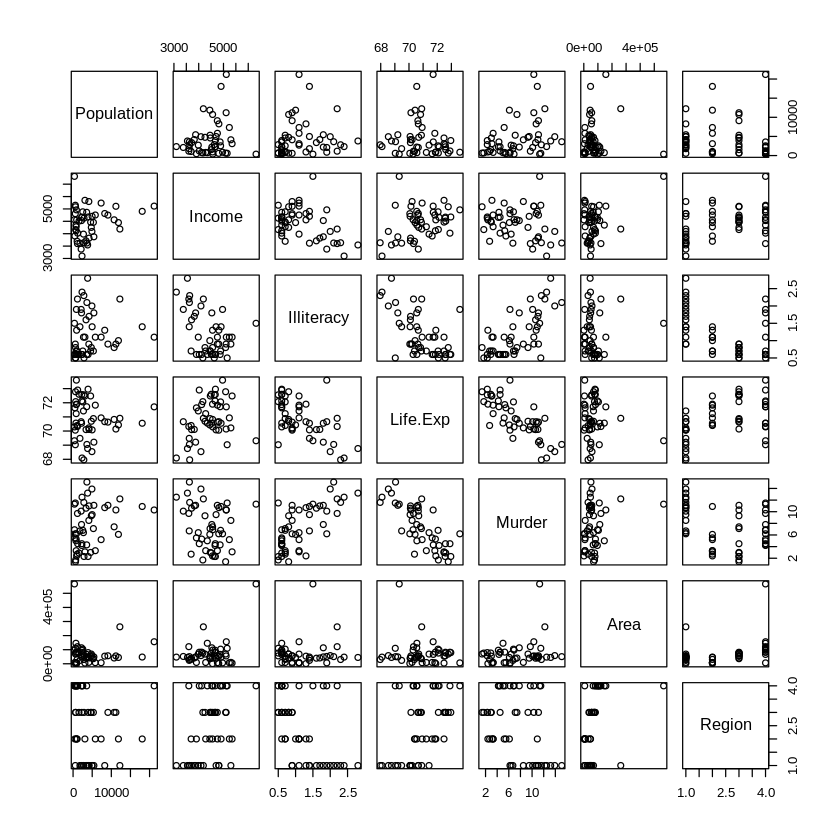

In [18]:
#Checking for homoscedasticity for the multiple regression model - expecting Region to not be normal because its categorical
par(mfrow=c(2,2))
plot(lm.data)
par(mfrow=c(1,1))

***Putting our findings into everyday language:
The Southern region shows a higher murder rate with lower life expectancy, income, and high school graduation rate but higher illiteracy, while northern region shows a lower murder rate with higher population density, life expectancy, income, and high school graduation rate but lower illiteracy.***

